In [37]:
from requests import get
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
def get_data(url):
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    
endpoint = (
    'https://api.coronavirus.data.gov.uk/v1/data?'
    'filters=areaType=nation;areaName=england&'
    'structure={"date":"date","cases":"newCasesByPublishDate", "admissions": "newAdmissions", "deaths": "newDailyNsoDeathsByDeathDate"}'
)
    
data = pd.DataFrame(get_data(endpoint)['data'])
data.date = pd.to_datetime(data.date)
data.sample()

,date,cases,admissions,deaths
530,2020-06-10,63.0,402.0,142.0


<AxesSubplot:xlabel='date'>

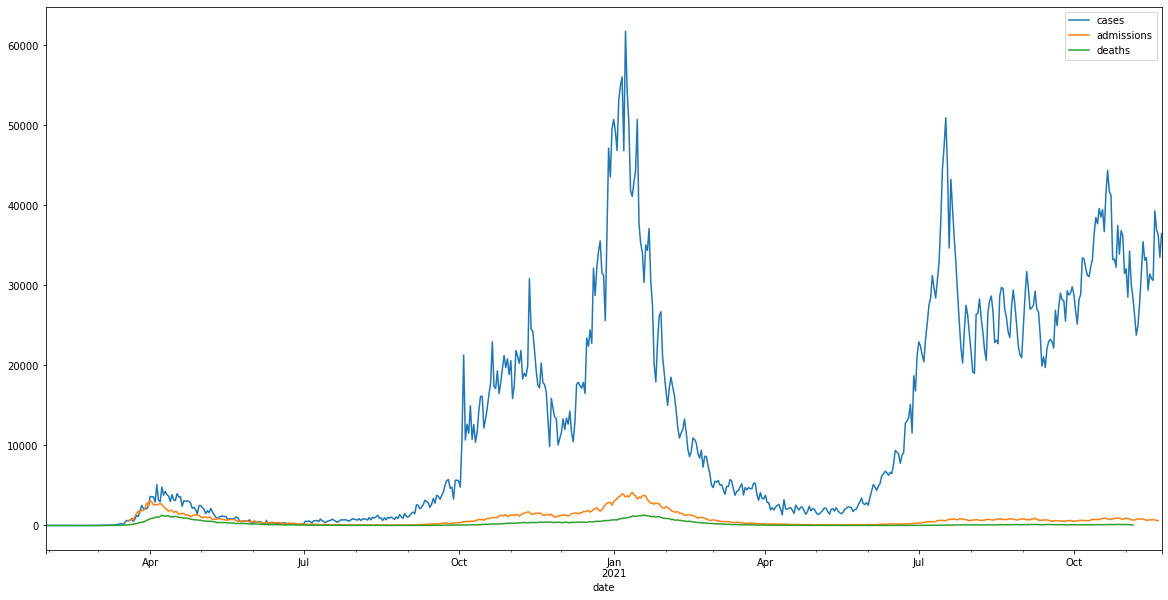

In [59]:
data.set_index('date').plot(figsize=(20,10))